In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dengue_features_train.csv')
df1 = pd.read_csv('dengue_labels_train.csv')
df2 = pd.read_csv('dengue_features_test.csv')
df3 = pd.read_csv('submission_format.csv')

In [3]:
df_copy = df.copy()
df1_copy = df1.copy()

In [4]:
merged_df = pd.merge(df_copy, df1_copy)

In [5]:
merged_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


<AxesSubplot:xlabel='year', ylabel='ndvi_ne'>

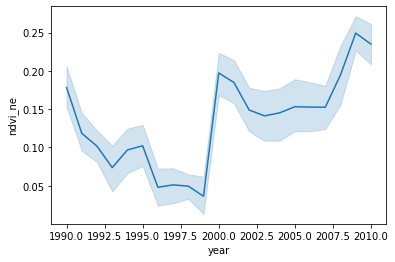

In [6]:
sns.lineplot(data=merged_df, x='year', y='ndvi_ne')

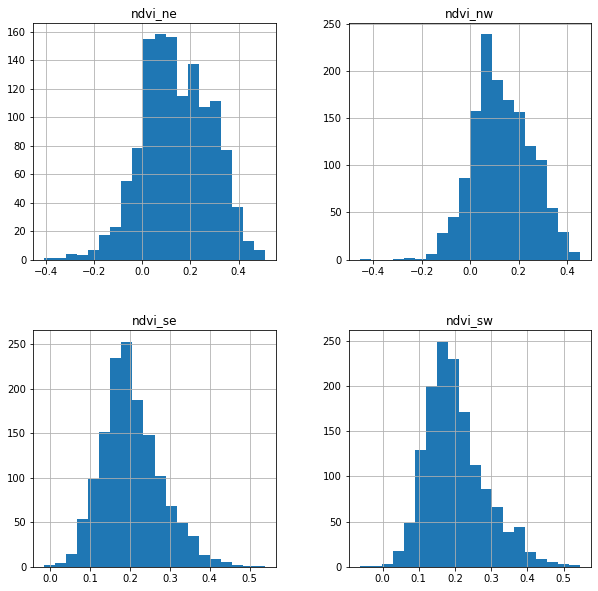

In [9]:
merged_df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].hist(bins=20, figsize=(10, 10))
plt.show()

In [10]:
px.histogram(merged_df, x='ndvi_ne', y='total_cases', color='city')

In [11]:
px.histogram(merged_df, x='ndvi_nw', y='total_cases')

In [12]:
px.histogram(merged_df, x='ndvi_se', y='total_cases')

In [13]:
px.histogram(merged_df, x='ndvi_sw', y='total_cases')

In [14]:
merged_df.groupby(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'])['total_cases'].sum().sort_values(ascending=False)

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw 
0.028667  0.057625  0.175857  0.152686    329
0.053467  0.093500  0.185433  0.173900    263
0.140650  0.127000  0.269750  0.246529    256
0.107200  0.056700  0.180967  0.172033    220
0.030700  0.075750  0.154817  0.190257    204
                                         ... 
0.244371  0.174643  0.217414  0.232300      0
0.175686  0.099483  0.225714  0.182786      0
0.348814  0.295717  0.404843  0.242571      0
0.271367  0.151567  0.347250  0.231867      0
0.317083  0.298967  0.219871  0.217343      0
Name: total_cases, Length: 1248, dtype: int64

In [15]:
merged_df['ndvi_ne_indicator'] = merged_df['ndvi_ne'].apply(lambda x: 'barren_vegitation' if (x<0.2) else 'sparse_vegitation' if ((x>=0.2)&(x<0.6)) else 'dense_vegitation')
merged_df['ndvi_nw_indicator'] = merged_df['ndvi_nw'].apply(lambda x: 'barren_vegitation' if (x<0.2) else 'sparse_vegitation' if ((x>=0.2)&(x<0.6)) else 'dense_vegitation')
merged_df['ndvi_se_indicator'] = merged_df['ndvi_se'].apply(lambda x: 'barren_vegitation' if (x<0.2) else 'sparse_vegitation' if ((x>=0.2)&(x<0.6)) else 'dense_vegitation')
merged_df['ndvi_sw_indicator'] = merged_df['ndvi_sw'].apply(lambda x: 'barren_vegitation' if (x<0.2) else 'sparse_vegitation' if ((x>=0.2)&(x<0.6)) else 'dense_vegitation')

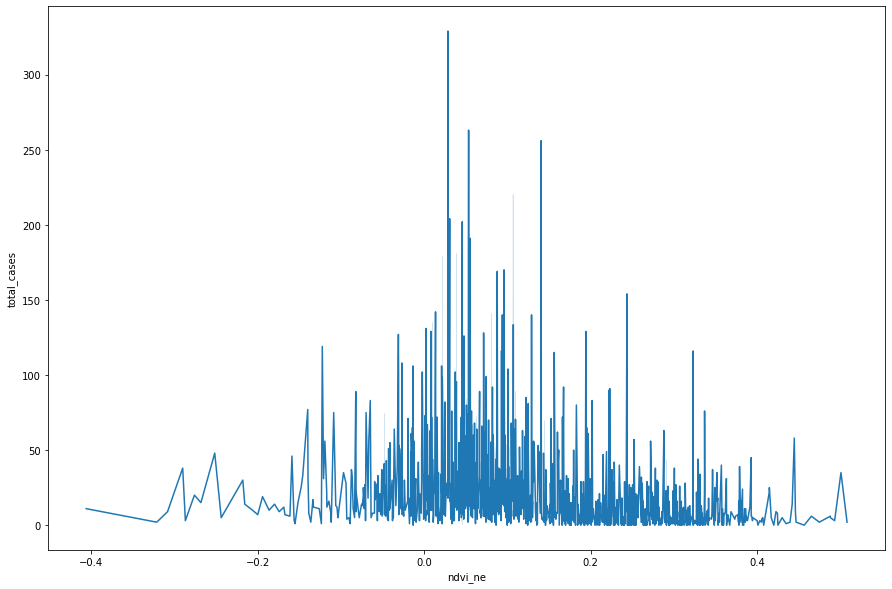

In [16]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=merged_df, x='ndvi_ne', y='total_cases')
plt.show()

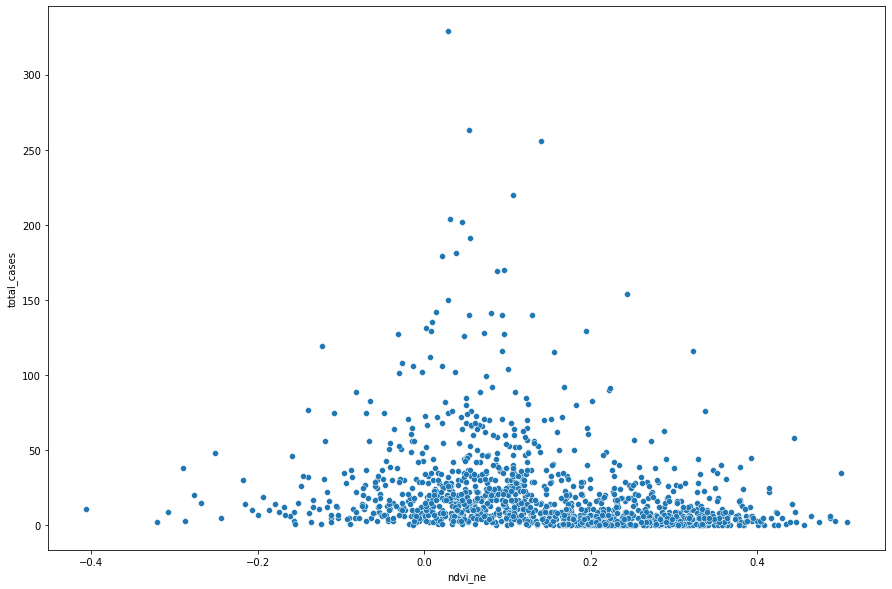

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=merged_df, x='ndvi_ne', y='total_cases')
plt.show()

In [18]:
merged_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,ndvi_ne_indicator,ndvi_nw_indicator,ndvi_se_indicator,ndvi_sw_indicator
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.900000,29.4,20.0,16.0,4,barren_vegitation,barren_vegitation,barren_vegitation,barren_vegitation
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,26.714286,6.371429,31.7,22.2,8.6,5,barren_vegitation,barren_vegitation,barren_vegitation,barren_vegitation
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.714286,6.485714,32.2,22.8,41.4,4,barren_vegitation,barren_vegitation,barren_vegitation,barren_vegitation
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,27.471429,6.771429,33.3,23.3,4.0,3,barren_vegitation,sparse_vegitation,sparse_vegitation,sparse_vegitation
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,28.942857,9.371429,35.0,23.9,5.8,6,barren_vegitation,sparse_vegitation,sparse_vegitation,sparse_vegitation


In [19]:
print(merged_df['ndvi_ne_indicator'].isna().sum())
print(merged_df['ndvi_ne_indicator'].value_counts())

0
barren_vegitation    818
sparse_vegitation    444
dense_vegitation     194
Name: ndvi_ne_indicator, dtype: int64


In [20]:
print(merged_df['ndvi_nw_indicator'].isna().sum())
print(merged_df['ndvi_nw_indicator'].value_counts())

0
barren_vegitation    1006
sparse_vegitation     398
dense_vegitation       52
Name: ndvi_nw_indicator, dtype: int64


In [21]:
print(merged_df['ndvi_se_indicator'].isna().sum())
print(merged_df['ndvi_se_indicator'].value_counts())

0
barren_vegitation    766
sparse_vegitation    668
dense_vegitation      22
Name: ndvi_se_indicator, dtype: int64


In [22]:
print(merged_df['ndvi_sw_indicator'].isna().sum())
print(merged_df['ndvi_sw_indicator'].value_counts())

0
barren_vegitation    795
sparse_vegitation    639
dense_vegitation      22
Name: ndvi_sw_indicator, dtype: int64


In [23]:
print(f"Barren Vegitation: {merged_df.loc[merged_df['ndvi_ne_indicator']=='barren_vegitation', 'total_cases'].sum()}")
print(f"Sparse Vegitation: {merged_df.loc[merged_df['ndvi_ne_indicator']=='sparse_vegitation', 'total_cases'].sum()}")
print(f"Dense Vegitation: {merged_df.loc[merged_df['ndvi_ne_indicator']=='dense_vegitation', 'total_cases'].sum()}")

Barren Vegitation: 22038
Sparse Vegitation: 4373
Dense Vegitation: 9516


In [24]:
print(f"Barren Vegitation: {merged_df.loc[merged_df['ndvi_nw_indicator']=='barren_vegitation', 'total_cases'].sum()}")
print(f"Sparse Vegitation: {merged_df.loc[merged_df['ndvi_nw_indicator']=='sparse_vegitation', 'total_cases'].sum()}")
print(f"Dense Vegitation: {merged_df.loc[merged_df['ndvi_nw_indicator']=='dense_vegitation', 'total_cases'].sum()}")

Barren Vegitation: 25930
Sparse Vegitation: 4269
Dense Vegitation: 5728


In [25]:
print(f"Barren Vegitation: {merged_df.loc[merged_df['ndvi_se_indicator']=='barren_vegitation', 'total_cases'].sum()}")
print(f"Sparse Vegitation: {merged_df.loc[merged_df['ndvi_se_indicator']=='sparse_vegitation', 'total_cases'].sum()}")
print(f"Dense Vegitation: {merged_df.loc[merged_df['ndvi_se_indicator']=='dense_vegitation', 'total_cases'].sum()}")

Barren Vegitation: 20254
Sparse Vegitation: 10958
Dense Vegitation: 4715


In [26]:
print(f"Barren Vegitation: {merged_df.loc[merged_df['ndvi_sw_indicator']=='barren_vegitation', 'total_cases'].sum()}")
print(f"Sparse Vegitation: {merged_df.loc[merged_df['ndvi_sw_indicator']=='sparse_vegitation', 'total_cases'].sum()}")
print(f"Dense Vegitation: {merged_df.loc[merged_df['ndvi_sw_indicator']=='dense_vegitation', 'total_cases'].sum()}")

Barren Vegitation: 21678
Sparse Vegitation: 9534
Dense Vegitation: 4715


In [27]:
merged_df.groupby('city')[['ndvi_ne_indicator', 'ndvi_nw_indicator', 'ndvi_se_indicator', 'ndvi_sw_indicator', 'total_cases']].sum()

,total_cases
city,
iq,3934
sj,31993


In [28]:
ndvi_df_melted = pd.melt(merged_df, id_vars=['city'], value_vars=['ndvi_ne_indicator', 'ndvi_nw_indicator', 'ndvi_se_indicator', 'ndvi_sw_indicator', 'total_cases'])

In [29]:
ndvi_df_melted.head()

,city,variable,value
0,sj,ndvi_ne_indicator,barren_vegitation
1,sj,ndvi_ne_indicator,barren_vegitation
2,sj,ndvi_ne_indicator,barren_vegitation
3,sj,ndvi_ne_indicator,barren_vegitation
4,sj,ndvi_ne_indicator,barren_vegitation


In [30]:
ndvi_df_melted['variable'].value_counts()

ndvi_ne_indicator    1456
ndvi_nw_indicator    1456
ndvi_se_indicator    1456
ndvi_sw_indicator    1456
total_cases          1456
Name: variable, dtype: int64

In [31]:
table_nw_i = pd.pivot_table(merged_df, values='total_cases', index=['year'], columns=['city', 'ndvi_nw_indicator'], aggfunc=np.sum)
table_nw_i

city                             iq                                     \
ndvi_nw_indicator barren_vegitation dense_vegitation sparse_vegitation   
year                                                                     
1990                            NaN              NaN               NaN   
1991                            NaN              NaN               NaN   
1992                            NaN              NaN               NaN   
1993                            NaN              NaN               NaN   
1994                            NaN              NaN               NaN   
1995                            NaN              NaN               NaN   
1996                            NaN              NaN               NaN   
1997                            NaN              NaN               NaN   
1998                            NaN              NaN               NaN   
1999                            NaN              NaN               NaN   
2000                            2.0              NaN               2.0   
2001                            1.0              NaN              13.0   
2002                          294.0             12.0             398.0   
2003                           37.0              NaN              77.0   
2004                          243.0              NaN             395.0   
2005                          108.0              9.0             194.0   
2006                          206.0              NaN             230.0   
2007                          113.0              NaN             252.0   
2008                          240.0              NaN             561.0   
2009                          196.0              NaN             128.0   
2010                           76.0              0.0             147.0   

city                             sj                                     
ndvi_nw_indicator barren_vegitation dense_vegitation sparse_vegitation  
year                                                                    
1990                          486.0              NaN             380.0  
1991                         2333.0            116.0             352.0  
1992                         2136.0             49.0             186.0  
1993                         1016.0            111.0              29.0  
1994                         1399.0           4893.0             241.0  
1995                         1103.0             17.0             213.0  
1996                          855.0              NaN               NaN  
1997                         1363.0             91.0               NaN  
1998                         4511.0             84.0               NaN  
1999                         1532.0            101.0               NaN  
2000                          378.0              NaN             114.0  
2001                         1103.0             97.0             263.0  
2002                          383.0             25.0              44.0  
2003                          903.0             26.0              20.0  
2004                          583.0             27.0               NaN  
2005                         1761.0             14.0              30.0  
2006                          530.0             20.0               NaN  
2007                         1936.0             33.0               NaN  
2008                          103.0              3.0               NaN  
2009                            NaN              NaN               NaN  
2010                            NaN              NaN               NaN

In [32]:
table_ne_i = pd.pivot_table(merged_df, values='total_cases', index=['year'], columns=['city', 'ndvi_ne_indicator'], aggfunc=np.sum)
table_ne_i

city                             iq                                     \
ndvi_ne_indicator barren_vegitation dense_vegitation sparse_vegitation   
year                                                                     
1990                            NaN              NaN               NaN   
1991                            NaN              NaN               NaN   
1992                            NaN              NaN               NaN   
1993                            NaN              NaN               NaN   
1994                            NaN              NaN               NaN   
1995                            NaN              NaN               NaN   
1996                            NaN              NaN               NaN   
1997                            NaN              NaN               NaN   
1998                            NaN              NaN               NaN   
1999                            NaN              NaN               NaN   
2000                            0.0              NaN               4.0   
2001                            1.0              NaN              13.0   
2002                          156.0             12.0             536.0   
2003                           34.0              NaN              80.0   
2004                           40.0              NaN             598.0   
2005                           74.0              9.0             228.0   
2006                          124.0              NaN             312.0   
2007                          107.0              NaN             258.0   
2008                          228.0              NaN             573.0   
2009                          165.0              NaN             159.0   
2010                           67.0              0.0             156.0   

city                             sj                                     
ndvi_ne_indicator barren_vegitation dense_vegitation sparse_vegitation  
year                                                                    
1990                          456.0            104.0             306.0  
1991                         2440.0            256.0             105.0  
1992                         1833.0            372.0             166.0  
1993                          887.0            207.0              62.0  
1994                         1447.0           5016.0              70.0  
1995                          706.0            282.0             345.0  
1996                          601.0            250.0               4.0  
1997                          945.0            460.0              49.0  
1998                         3987.0            608.0               NaN  
1999                         1188.0            445.0               NaN  
2000                          304.0             57.0             131.0  
2001                         1149.0            173.0             141.0  
2002                          398.0             48.0               6.0  
2003                          761.0            188.0               NaN  
2004                          479.0            113.0              18.0  
2005                         1478.0            327.0               NaN  
2006                          479.0             68.0               3.0  
2007                         1441.0            478.0              50.0  
2008                           63.0             43.0               NaN  
2009                            NaN              NaN               NaN  
2010                            NaN              NaN               NaN

In [33]:
table_se_i = pd.pivot_table(merged_df, values='total_cases', index=['year'], columns=['city', 'ndvi_se_indicator'], aggfunc=np.sum)
table_se_i

city                             iq                                     \
ndvi_se_indicator barren_vegitation dense_vegitation sparse_vegitation   
year                                                                     
1990                            NaN              NaN               NaN   
1991                            NaN              NaN               NaN   
1992                            NaN              NaN               NaN   
1993                            NaN              NaN               NaN   
1994                            NaN              NaN               NaN   
1995                            NaN              NaN               NaN   
1996                            NaN              NaN               NaN   
1997                            NaN              NaN               NaN   
1998                            NaN              NaN               NaN   
1999                            NaN              NaN               NaN   
2000                            0.0              NaN               4.0   
2001                            2.0              NaN              12.0   
2002                          162.0             12.0             530.0   
2003                           40.0              NaN              74.0   
2004                          213.0              NaN             425.0   
2005                           73.0              9.0             229.0   
2006                          154.0              NaN             282.0   
2007                           91.0              NaN             274.0   
2008                          271.0              NaN             530.0   
2009                          150.0              NaN             174.0   
2010                           92.0              0.0             131.0   

city                             sj                                     
ndvi_se_indicator barren_vegitation dense_vegitation sparse_vegitation  
year                                                                    
1990                          544.0              NaN             322.0  
1991                         2375.0              NaN             426.0  
1992                         2212.0              NaN             159.0  
1993                          814.0             30.0             312.0  
1994                         1373.0           4576.0             584.0  
1995                          740.0              NaN             593.0  
1996                          635.0              NaN             220.0  
1997                          652.0              NaN             802.0  
1998                         3491.0              NaN            1104.0  
1999                         1276.0             59.0             298.0  
2000                          279.0              NaN             213.0  
2001                          479.0              NaN             984.0  
2002                          232.0             19.0             201.0  
2003                          546.0              NaN             403.0  
2004                          392.0              NaN             218.0  
2005                         1166.0             10.0             629.0  
2006                          435.0              NaN             115.0  
2007                         1320.0              NaN             649.0  
2008                           45.0              NaN              61.0  
2009                            NaN              NaN               NaN  
2010                            NaN              NaN               NaN

In [34]:
table_sw_i = pd.pivot_table(merged_df, values='total_cases', index=['year'], columns=['city', 'ndvi_sw_indicator'], aggfunc=np.sum)
table_sw_i

city                             iq                                     \
ndvi_sw_indicator barren_vegitation dense_vegitation sparse_vegitation   
year                                                                     
1990                            NaN              NaN               NaN   
1991                            NaN              NaN               NaN   
1992                            NaN              NaN               NaN   
1993                            NaN              NaN               NaN   
1994                            NaN              NaN               NaN   
1995                            NaN              NaN               NaN   
1996                            NaN              NaN               NaN   
1997                            NaN              NaN               NaN   
1998                            NaN              NaN               NaN   
1999                            NaN              NaN               NaN   
2000                            1.0              NaN               3.0   
2001                            5.0              NaN               9.0   
2002                          183.0             12.0             509.0   
2003                           29.0              NaN              85.0   
2004                           70.0              NaN             568.0   
2005                           89.0              9.0             213.0   
2006                          157.0              NaN             279.0   
2007                           54.0              NaN             311.0   
2008                          193.0              NaN             608.0   
2009                           81.0              NaN             243.0   
2010                           59.0              0.0             164.0   

city                             sj                                     
ndvi_sw_indicator barren_vegitation dense_vegitation sparse_vegitation  
year                                                                    
1990                          435.0              NaN             431.0  
1991                         2319.0              NaN             482.0  
1992                         1968.0              NaN             403.0  
1993                          901.0             30.0             225.0  
1994                         1329.0           4576.0             628.0  
1995                          884.0              NaN             449.0  
1996                          613.0              NaN             242.0  
1997                          768.0              NaN             686.0  
1998                         3987.0              NaN             608.0  
1999                         1460.0             59.0             114.0  
2000                          385.0              NaN             107.0  
2001                          754.0              NaN             709.0  
2002                          347.0             19.0              86.0  
2003                          623.0              NaN             326.0  
2004                          465.0              NaN             145.0  
2005                         1292.0             10.0             503.0  
2006                          485.0              NaN              65.0  
2007                         1667.0              NaN             302.0  
2008                           75.0              NaN              31.0  
2009                            NaN              NaN               NaN  
2010                            NaN              NaN               NaN

In [35]:
merged_df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [36]:
merged_df.shape

(1456, 29)

In [37]:
merged_df.loc[merged_df['ndvi_ne_indicator']=='sparse_vegitation', 'ndvi_ne'].isna().value_counts()

False    444
Name: ndvi_ne, dtype: int64

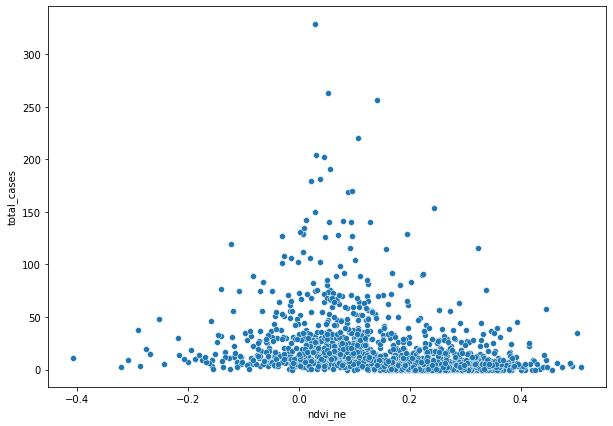

In [38]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='ndvi_ne', y='total_cases')
plt.show()

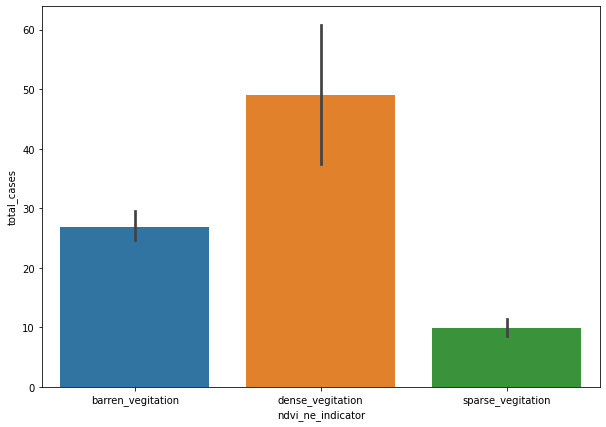

In [39]:
plt.figure(figsize=(10, 7))
sns.barplot(data=merged_df, x='ndvi_ne_indicator', y='total_cases')
plt.show()

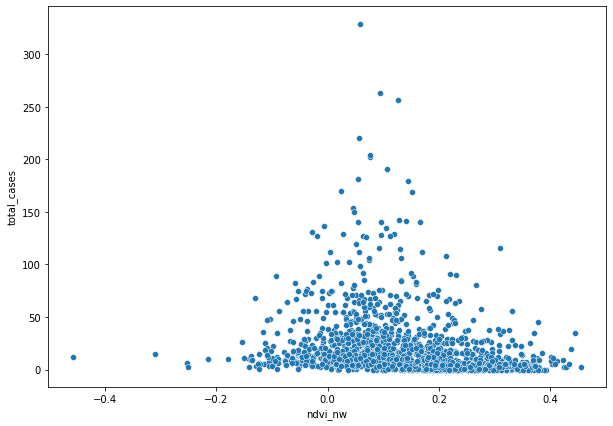

In [40]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='ndvi_nw', y='total_cases')
plt.show()

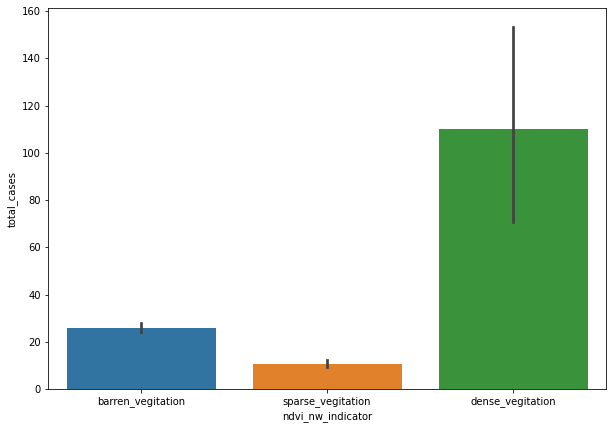

In [41]:
plt.figure(figsize=(10, 7))
sns.barplot(data=merged_df, x='ndvi_nw_indicator', y='total_cases')
plt.show()

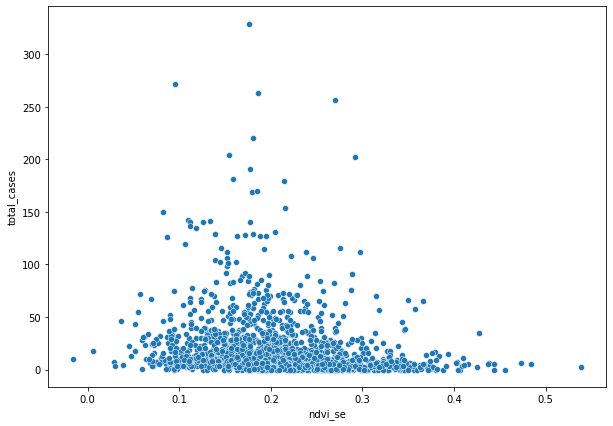

In [42]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='ndvi_se', y='total_cases')
plt.show()

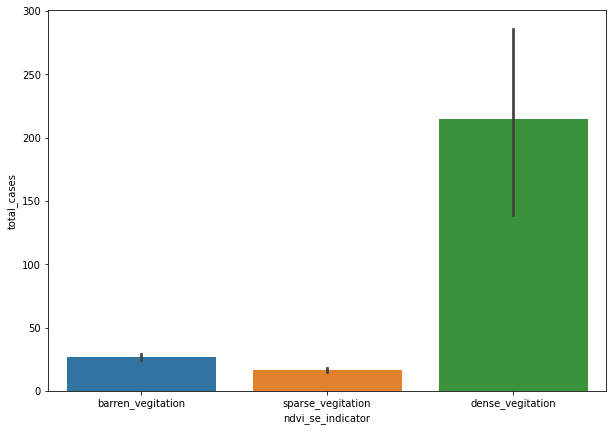

In [43]:
plt.figure(figsize=(10, 7))
sns.barplot(data=merged_df, x='ndvi_se_indicator', y='total_cases')
plt.show()

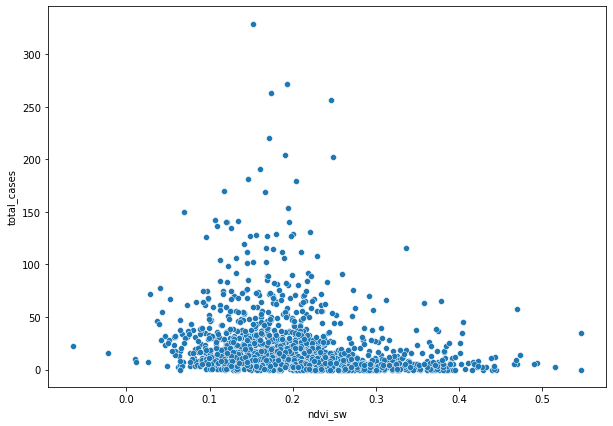

In [44]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='ndvi_sw', y='total_cases')
plt.show()

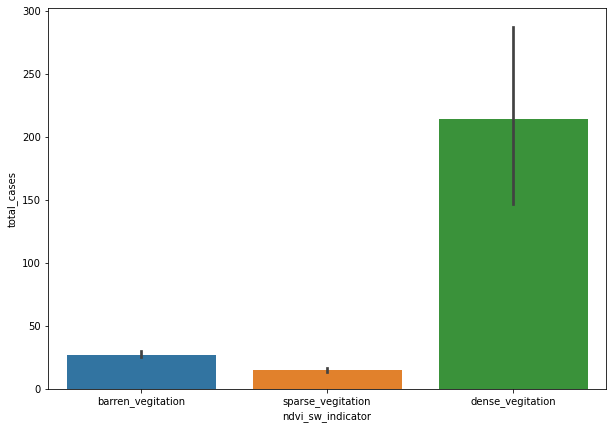

In [45]:
plt.figure(figsize=(10, 7))
sns.barplot(data=merged_df, x='ndvi_sw_indicator', y='total_cases')
plt.show()